<a href="https://colab.research.google.com/github/tiagopessoalima/teaching/blob/main/02_projeto_de_aprendizado_de_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Aprendizado de Máquina: Ponta a Ponta**

Nesta aula, será realizada a análise de um projeto de Aprendizado de Máquina, seguindo o pipeline de um Cientista de Dados. As etapas são:

1. Definição do problema;
2. Coleta de dados;
3. Pré-processamento dos dados;
4. Seleção de features;
5. Treinamento do modelo;
6. Ajuste de hiperparâmetros;
7. Avaliação dos resultados;
8. Deployment em produção.








## **1. Definição do Problema**

**Problema de Negócio:**

O mercado imobiliário é caracterizado por sua dinâmica e complexidade, com os preços dos imóveis sendo influenciados por uma multitude de fatores. A capacidade de estimar o valor de um imóvel de forma precisa é fundamental para a tomada de decisões informadas por parte de compradores, vendedores, investidores e instituições financeiras.

**Descrição do Conjunto de Dados:**

O conjunto de dados utilizado neste projeto contém informações sobre diferentes distritos da [Califórnia](https://pt.wikipedia.org/wiki/Calif%C3%B3rnia), com o objetivo de prever os valores medianos das casas nessas regiões. As features disponíveis incluem:

* **Localização geográfica:** Informações sobre a localização dos distritos.
* **Características demográficas:** Número de habitantes, renda média, etc.
* **Características dos imóveis:** Número de quartos, idade média das casas, etc.

Este conjunto é muito utilizado em estudos de [regressão](https://pt.wikipedia.org/wiki/Regress%C3%A3o_(estat%C3%ADstica)) para modelar a relação entre essas variáveis e o preço mediano dos imóveis.

**Objetivos do Projeto:**

* **Modelagem Preditiva:** Desenvolver um modelo de aprendizado de máquina capaz de prever o preço de um imóvel na Califórnia.
* **Identificação de Fatores Influentes:** Identificar as características mais relevantes que exercem influência sobre o preço dos imóveis.
* **Geração de Insights:** Fornecer insights que possam auxiliar compradores, vendedores e outros participantes do mercado imobiliário.

**[Métricas de Avaliação:](https://www.youtube.com/watch?v=DvPXuIWPIN0)**

* **[Erro Quadrático Médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio) (RMSE):** Métrica amplamente utilizada para avaliar o desempenho de modelos de regressão, quantificando a discrepância entre os preços previstos pelo modelo e os preços reais dos imóveis.

* **[R²](https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o) (Coeficiente de Determinação):** Métrica que expressa a proporção da variância nos preços dos imóveis que é explicada pelo modelo, indicando o quão bem o modelo se ajusta aos dados.

Com o problema definido e as métricas estabelecidas, o próximo passo consiste na coleta e exploração dos dados do repositório StatLib, visando compreender suas características e preparar o terreno para as etapas subsequentes de pré-processamento e seleção de features.

## **2. Coleta de Dados**


Neste projeto, o conjunto de dados foi obtido diretamente do repositório GitHub de [Aurélien Géron](https://github.com/ageron), autor do livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://github.com/ageron/handson-ml2). Alternativamente, o *dataset* também está disponível no [kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

### **Baixar os Dados**

In [1]:
import os
import tarfile
from urllib.request import urlretrieve # Correção: use urlretrieve diretamente

# Constantes para URLs e caminhos
URL_RAIZ_DOWNLOAD = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
CAMINHO_DADOS_IMOVEIS = os.path.join("datasets", "housing")
URL_DADOS_IMOVEIS = URL_RAIZ_DOWNLOAD + "datasets/housing/housing.tgz"

# Cria o diretório se não existir, sem gerar erro se já existir
os.makedirs(CAMINHO_DADOS_IMOVEIS, exist_ok=True)
caminho_arquivo_tgz = os.path.join(CAMINHO_DADOS_IMOVEIS, "housing.tgz")

# Verifica se o arquivo já existe antes de baixar
if not os.path.exists(caminho_arquivo_tgz):
    print(f"Baixando dados de {URL_DADOS_IMOVEIS} para {caminho_arquivo_tgz}")
    urlretrieve(URL_DADOS_IMOVEIS, caminho_arquivo_tgz) # Correção: use urlretrieve
else:
    print(f"Arquivo {caminho_arquivo_tgz} já existe. Pulando download.")

# Extrai o arquivo apenas se o arquivo CSV de dados não existir
caminho_arquivo_csv = os.path.join(CAMINHO_DADOS_IMOVEIS, "housing.csv")
if not os.path.exists(caminho_arquivo_csv):
    with tarfile.open(caminho_arquivo_tgz) as arquivo_tgz_imoveis:
        print("Extraindo dados...")
        arquivo_tgz_imoveis.extractall(path=CAMINHO_DADOS_IMOVEIS)
else:
    print(f"Dados já extraídos em {caminho_arquivo_csv}. Pulando extração.")

Baixando dados de https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz para datasets/housing/housing.tgz
Extraindo dados...


### **Carregar os Dados**

In [2]:
import pandas as pd

# Definir a variável `csv_path` usando `os.path.join` para juntar o `CAMINHO_DADOS_IMOVEIS` com o nome do arquivo CSV "housing.csv"
csv_path = os.path.join(CAMINHO_DADOS_IMOVEIS, "housing.csv")

# Usar `pd.read_csv` para ler o arquivo CSV localizado em `csv_path` e armazenar o resultado em um DataFrame chamado `housing`
housing = pd.read_csv(csv_path)

### **Analisar os Dados**








Vamos começar olhando para as 5 primeiras linhas do *DataFrame* `housing` usando o método `head()`

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Prosseguiremos com a tradução das colunas do *DataFrame* `housing` para o português, para facilitar a compreensão e análise dos dados.

In [4]:
housing = housing.rename(columns={
    'longitude': 'longitude',
    'latitude': 'latitude',
    'housing_median_age': 'idade_média_moradias',
    'total_rooms': 'total_cômodos',
    'total_bedrooms': 'total_quartos',
    'population': 'população',
    'households': 'domicílios',
    'median_income': 'renda_mediana',
    'median_house_value': 'valor_mediano_casas',
    'ocean_proximity': 'proximidade_ao_oceano'
})

E agora com a tradução dos valores da coluna `proximidade_ao_oceano`.

In [5]:
housing['proximidade_ao_oceano'] = housing['proximidade_ao_oceano'].replace({
    'NEAR BAY': 'PERTO DA BAÍA',
    '<1H OCEAN': 'MENOS DE 1H DO OCEANO',
    'INLAND': 'INTERIOR',
    'NEAR OCEAN': 'PERTO DO OCEANO',
    'ISLAND': 'ILHA'
})

Para apresentar o *DataFrame* `housing` traduzido para o português, vamos exibir novamente as 5 primeiras linhas usando o método `head()`

In [6]:
housing.head()

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA


Em seguida, será feita a análise do número de linhas, colunas, tipos de dados e a quantidade de valores nulos, utilizando o método `info()`.

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              20640 non-null  float64
 1   latitude               20640 non-null  float64
 2   idade_média_moradias   20640 non-null  float64
 3   total_cômodos          20640 non-null  float64
 4   total_quartos          20433 non-null  float64
 5   população              20640 non-null  float64
 6   domicílios             20640 non-null  float64
 7   renda_mediana          20640 non-null  float64
 8   valor_mediano_casas    20640 non-null  float64
 9   proximidade_ao_oceano  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observações Gerais:**

- O *dataset* contém informações sobre 20.640 imóveis na Califórnia;
- A coluna `total_quartos` possui cerca de 200 valores ausentes;
- A coluna `proximidade_ao_oceano` não é numérica.

In [8]:
housing["proximidade_ao_oceano"].value_counts()

,count
proximidade_ao_oceano,
MENOS DE 1H DO OCEANO,9136
INTERIOR,6551
PERTO DO OCEANO,2658
PERTO DA BAÍA,2290
ILHA,5


Agora, utilizaremos o método `describe()` para obter um resumo estatístico das colunas numéricas do conjunto de dados, incluindo informações como a média, desvio padrão, valores mínimo e máximo, além dos percentis.



In [9]:
housing.describe()

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Observações Gerais:**

- A distribuição geográfica dos imóveis, representada por longitude e latitude, abrange uma área considerável da Califórnia.
- A `idade_média_moradias` varia de 1 a 52 anos, com uma média de 28.6 anos, sugerindo uma mistura de imóveis novos e antigos.
- O número de cômodos (`total_cômodos`) e quartos (`total_quartos`) apresentam alta variabilidade, com valores máximos muito distantes das médias, indicando a presença de imóveis de grande porte.
- As colunas `população` e `domicílios` também exibem grande variação, refletindo a diversidade de densidade populacional.
- O `valor_mediano_casas` também apresenta alta variabilidade, com valores máximos muito acima da média.

### **Visualisar os Dados**

Através de gráficos e mapas, podemos obter *insights* valiosos sobre as relações entre as variáveis e a distribuição dos dados, o que nos auxiliará nas etapas subsequentes de pré-processamento e modelagem.

#### **Histogramas**

 São gráficos que mostram a distribuição de frequência de um conjunto de dados numéricos. Cada barra representa um intervalo de valores, e sua altura indica quantos dados caem dentro daquele intervalo. Isso permite visualizar rapidamente a forma da distribuição, identificando onde os dados se concentram, se há valores extremos (outliers) e se a distribuição é simétrica ou assimétrica.

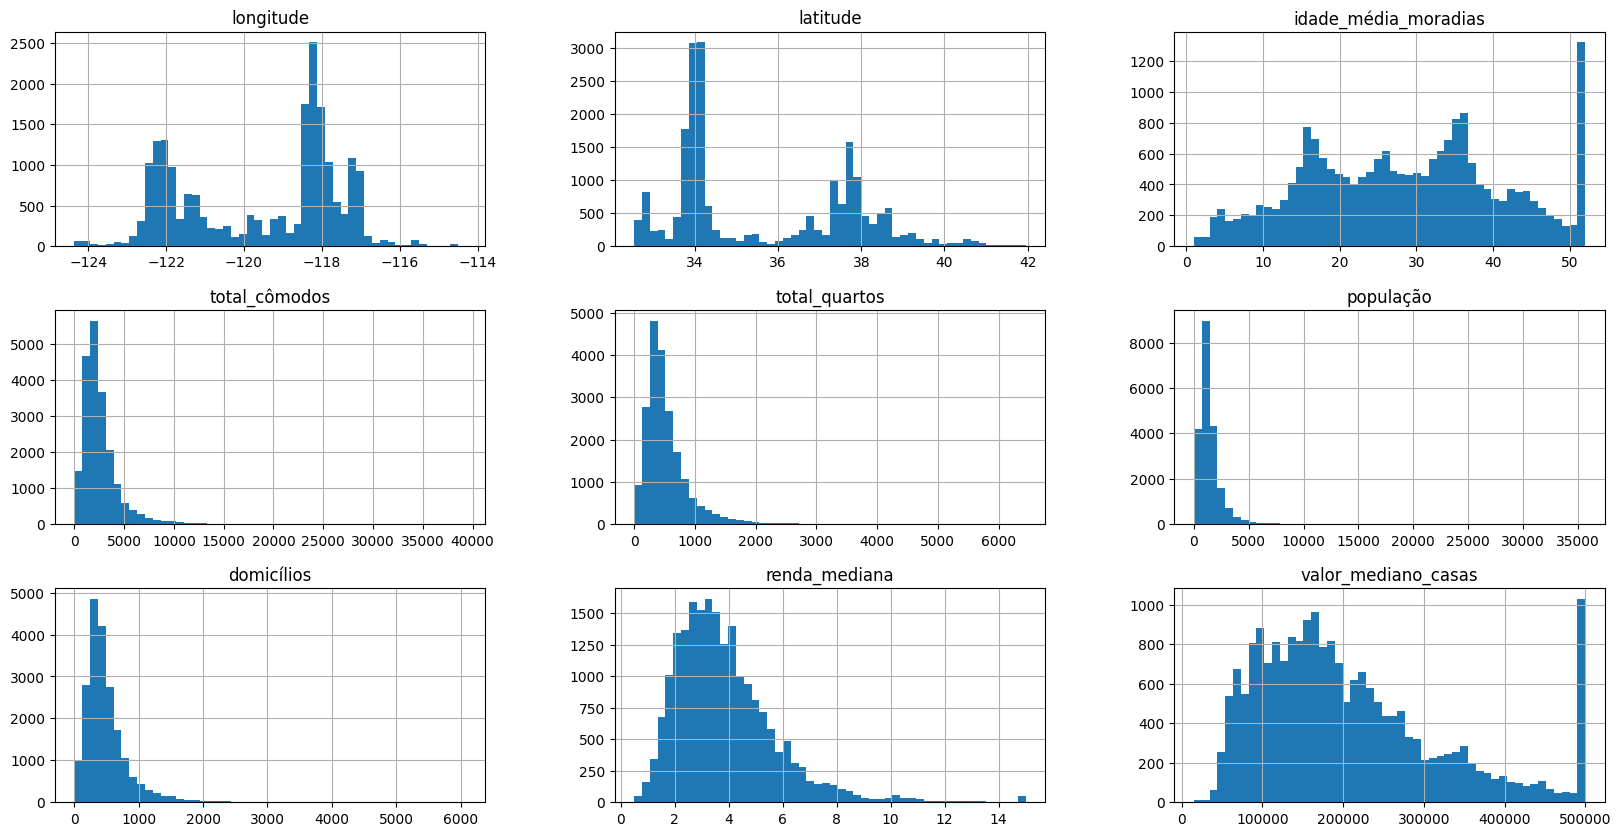

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,10))
plt.show()

**Observações Gerais**

* **`longitude` e `latitude`:** Os histogramas mostram que os dados estão concentrados em determinadas faixas de longitude e latitude, o que é esperado, já que os imóveis estão localizados na Califórnia. A distribuição da longitude é mais concentrada, enquanto a latitude apresenta uma distribuição mais espalhada.
* **`idade_mediana_das_casas`:** A maioria dos imóveis parece ter uma idade mediana entre 10 e 30 anos, com uma cauda longa à direita, indicando a presença de alguns imóveis mais antigos.
* **`total_de_comodos` e `total_de_quartos`:** Ambas as variáveis apresentam distribuições assimétricas à direita, com a maioria dos imóveis tendo um número relativamente baixo de cômodos e quartos. Existem alguns outliers com valores muito altos, o que pode indicar a presença de mansões ou prédios de apartamentos.
* **`população` e `domicílios`:** Assim como as variáveis anteriores, essas também apresentam distribuições assimétricas à direita. A maioria dos distritos tem uma população e número de domicílios relativamente baixos, com alguns outliers com valores muito altos, possivelmente representando áreas urbanas densamente povoadas.
* **`renda_mediana`:** A distribuição da renda mediana também é assimétrica à direita, com a maioria dos distritos tendo uma renda mediana entre 2 e 5 (em dezenas de milhares de dólares). Isso sugere que a maioria dos imóveis está localizada em áreas de renda média a baixa, com alguns em áreas de alta renda.
* **`valor_mediano_da_casa`:** A variável alvo também apresenta uma distribuição assimétrica à direita, com a maioria dos imóveis tendo um valor mediano abaixo de 250.000 dólares.


#### **Mapas**

São representações visuais que mostram a distribuição geográfica de um conjunto de dados. Cada área no mapa é colorida ou sinalizada de acordo com a intensidade ou frequência de um dado específico, permitindo a visualização das variações espaciais. Isso ajuda a identificar padrões geográficos, como áreas com maior concentração de dados, a presença de clusters ou aglomerados, e variações regionais.



##### **Distribuição Espacial de Dados de Habitação**

O gráfico abaixo oferece uma visualização da distribuição espacial dos dados. É possível observar se os pontos estão agrupados em certas regiões, se existem áreas com maior densidade de pontos ou se há pontos isolados (*outliers*). Essa visualização inicial pode ajudar a identificar padrões geográficos relevantes nos dados e orientar análises posteriores.

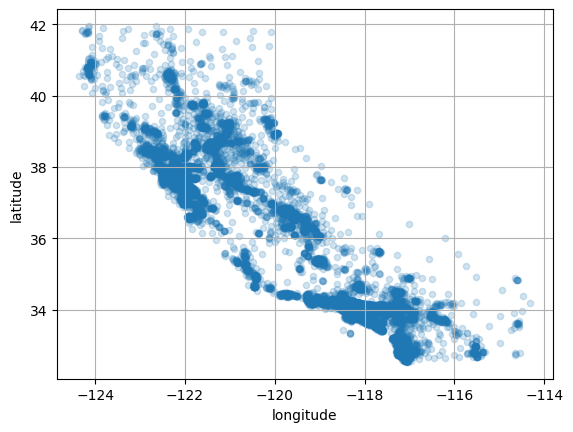

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

##### **Distribuição Espacial de Habitação com População e Valor Mediano das Casas**



O próximo gráfico de dispersão possui melhorias importantes em relação ao anterior:

Melhoria | Descrição |
--- | --- |
Tamanho dos pontos | Proporcional à população da área, permitindo identificar visualmente as regiões mais populosas de forma rápida.
Cores | Cada ponto é colorido de acordo com o valor mediano das casas, com cores mais quentes indicando valores mais elevados.


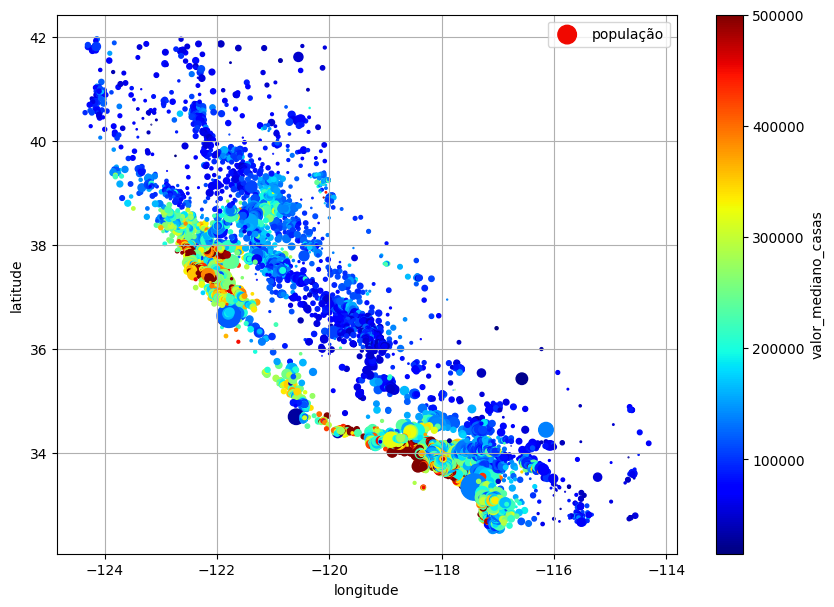

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["população"] / 100, label="população",
             c="valor_mediano_casas", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

O código a seguir cria um gráfico que sobrepõe o gráfico anterior sobre um mapa da Califórnia, permitindo uma análise intuitiva da relação entre localização, população e valor mediano das casas.

In [13]:
import urllib

# Caminho para salvar as imagens
caminho_imagens = os.path.join("images")
os.makedirs(caminho_imagens, exist_ok=True)  # Cria a pasta se ela não existir

# URL base para download
URL_RAIZ_DOWNLOAD = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
nome_arquivo = "california.png"
print("Baixando o mapa", nome_arquivo)
url = URL_RAIZ_DOWNLOAD + "images/end_to_end_project/" + nome_arquivo

# Baixar e salvar a imagem
urllib.request.urlretrieve(url, os.path.join(caminho_imagens, nome_arquivo))

Baixando o mapa california.png


('images/california.png', <http.client.HTTPMessage at 0x7b6d22a0fac0>)

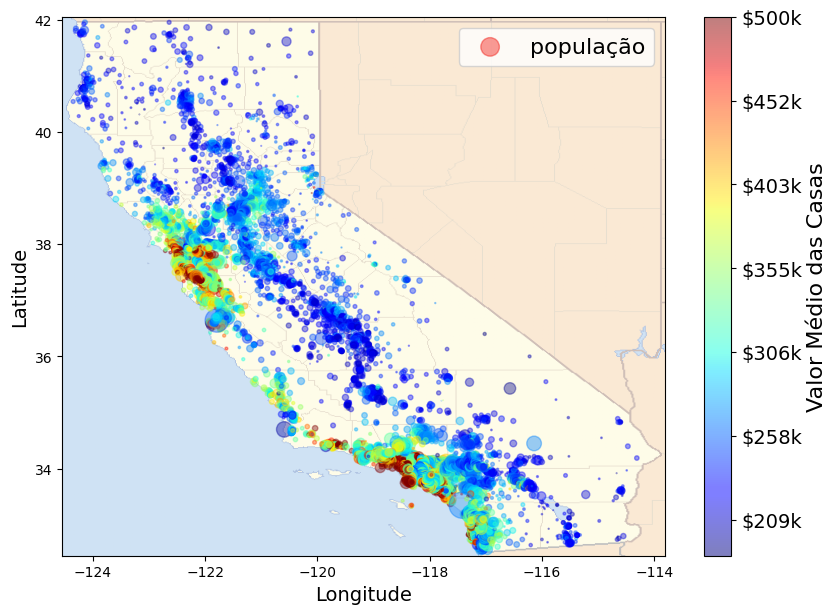

In [14]:
import matplotlib.image as mpimg
import numpy as np

# Carregar a imagem da Califórnia
imagem_california = mpimg.imread(os.path.join(caminho_imagens, nome_arquivo))

# Criar o gráfico de dispersão
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['população']/100, label="população",
                  c="valor_mediano_casas", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

# Sobrepor a imagem da Califórnia no gráfico
plt.imshow(imagem_california, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# Adicionar rótulos aos eixos
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Configurar a barra de cores
precos = housing["valor_mediano_casas"]
valores_ticks = np.linspace(precos.min(), precos.max(), 11)
barra_cores = plt.colorbar(ticks=valores_ticks/precos.max())
barra_cores.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in valores_ticks], fontsize=14)
barra_cores.set_label('Valor Médio das Casas', fontsize=16)

# Adicionar legenda
plt.legend(fontsize=16)

# Exibir o gráfico
plt.show()

## **3. Pré-processamento dos Dados**

Após a exploração e visualização dos dados, que nos forneceram uma compreensão das suas características e desafios potenciais, é essencial avançar para o pré-processamento. Esta fase é crítica para a preparação dos dados para modelagem, assegurando que estejam em um formato apropriado para os algoritmos de aprendizado de máquina. O pré-processamento envolve a transformação dos dados brutos em um estado que maximize a eficácia dos modelos, abordando questões como qualidade dos dados, escalabilidade e relevância das features.










### **Tratamento de Valores Ausentes:**



É fundamental abordar valores ausentes de maneira adequada para manter a integridade dos dados. As estratégias incluem a exclusão de linhas ou colunas com uma quantidade significativa de valores ausentes, ou a imputação desses valores utilizando métodos estatísticos.

#### **Exclusão de Linhas ou Colunas**


Eliminar todas as linhas que contêm pelo menos um valor nulo é uma estratégia direta de limpeza de dados. No entanto, essa abordagem pode resultar em perda significativa de informações, especialmente em casos onde a quantidade de registros incompletos é elevada, impactando a representatividade e a qualidade da análise subsequente.

In [15]:
# Excluir linhas que contêm valores ausentes
df_cleaned = housing.dropna()

# Exibir o DataFrame limpo
df_cleaned

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INTERIOR
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INTERIOR
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INTERIOR
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INTERIOR


Excluir as colunas com alta porcentagem de valores nulos, geralmente acima de um limiar previamente definido, é uma abordagem mais seletiva de tratamento de dados incompletos. Embora essa estratégia mantenha uma maior quantidade de registros, existe o risco de remover variáveis potencialmente relevantes para a análise, comprometendo a integridade dos modelos preditivos ou das inferências subsequentes.

In [16]:
# Definir o limite de valores ausentes
threshold = 0.8  # Excluir colunas com mais de 80% de valores ausentes

# Calcular o número mínimo de valores não ausentes necessários
min_non_na = len(housing) * (1 - threshold)

# Excluir colunas com valores ausentes acima do limite especificado
df_cleaned = housing.dropna(axis=1, thresh=min_non_na)

# Exibir o DataFrame limpo
df_cleaned.head()

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA


#### **Imputação de Valores Ausentes**

- **Média:** Para colunas numéricas, você pode substituir valores ausentes pela média dos valores não ausentes.

- **Mediana:** Em dados com distribuição assimétrica, a mediana pode ser uma escolha mais robusta do que a média.

- **Moda:** Para variáveis categóricas, pode-se substituir valores ausentes pela moda (o valor mais frequente).

- **Métodos Avançados:** Técnicas como KNN ou regressão podem prever valores ausentes com base em outras variáveis.







In [17]:
from sklearn.impute import KNNImputer

# Imputa valores ausentes com a média
housing_imputed_mean = housing.copy()
housing_imputed_mean['total_quartos'].fillna(housing['total_quartos'].mean(), inplace=True)

# Imputa valores ausentes com a mediana
housing_imputed_median = housing.copy()
housing_imputed_median['total_quartos'].fillna(housing['total_quartos'].median(), inplace=True)

# Imputa valores ausentes com KNN
imputer = KNNImputer(n_neighbors=3)
housing_imputed_knn = pd.DataFrame(imputer.fit_transform(housing.iloc[:,:-1]), columns=housing.columns[:-1])

# Imprime as 5 primeiras linhas de cada DataFrame imputado
print("\nImputado com a Média:")
print(housing_imputed_mean.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nImputado com a Mediana:")
print(housing_imputed_median.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nImputado com KNN:")
print(housing_imputed_knn.head().to_markdown(index=False, numalign="left", stralign="left"))


Imputado com a Média:
| longitude   | latitude   | idade_média_moradias   | total_cômodos   | total_quartos   | população   | domicílios   | renda_mediana   | valor_mediano_casas   | proximidade_ao_oceano   |
|:------------|:-----------|:-----------------------|:----------------|:----------------|:------------|:-------------|:----------------|:----------------------|:------------------------|
| -122.23     | 37.88      | 41                     | 880             | 129             | 322         | 126          | 8.3252          | 452600                | PERTO DA BAÍA           |
| -122.22     | 37.86      | 21                     | 7099            | 1106            | 2401        | 1138         | 8.3014          | 358500                | PERTO DA BAÍA           |
| -122.24     | 37.85      | 52                     | 1467            | 190             | 496         | 177          | 7.2574          | 352100                | PERTO DA BAÍA           |
| -122.25     | 37.85      | 52           

**ATENÇÃO:** Durante a imputação, é essencial evitar o vazamento de dados entre os conjuntos de treino e teste. O vazamento de dados ocorre quando informações do conjunto de teste são utilizadas para ajustar o modelo durante o treinamento, comprometendo a avaliação imparcial do desempenho do modelo. Imputar valores ausentes em todo o conjunto de dados antes da separação em treino e teste pode levar a um vazamento, pois os métodos de imputação podem utilizar informações dos dados de teste para ajustar as estimativas.

### **Identificação e Tratamento de Outliers:**


Outliers são observações que se desviam significativamente dos padrões gerais do conjunto de dados e podem comprometer a integridade do modelo. Identificar e tratar outliers é fundamental para garantir a robustez dos modelos preditivos. A identificação de outliers pode ser realizada através de métodos estatísticos e técnicas de visualização. O tratamento pode envolver a remoção dos outliers, a aplicação de transformações ou a utilização de algoritmos robustos que não sejam influenciados por esses valores extremos.

#### **Identificação por Métodos Estatísticos**

**Desvios Padrão:** *Outliers* podem ser identificados como valores que estão a mais de 2 ou 3 desvios padrão da média em distribuições normais.

In [18]:
# Definir a feature para análise
feature1 = 'total_cômodos'

# Calcular a média e o desvio padrão da feature
mean = housing[feature1].mean()
std_dev = housing[feature1].std()

# Definir o limiar para a detecção de outliers
threshold = 3

# Identificar outliers como valores que estão a mais de 'threshold' desvios padrão da média
outliers = housing[(housing[feature1] > mean + threshold * std_dev) |
                   (housing[feature1] < mean - threshold * std_dev)]

# Exibir os outliers identificados
outliers

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,PERTO DA BAÍA
570,-122.24,37.72,5.0,18634.0,2885.0,7427.0,2718.0,7.6110,350700.0,PERTO DA BAÍA
576,-122.06,37.77,12.0,14316.0,2045.0,5781.0,2007.0,7.2634,341600.0,PERTO DA BAÍA
780,-122.10,37.63,18.0,9963.0,2031.0,5613.0,1946.0,3.8171,187200.0,PERTO DA BAÍA
864,-122.01,37.57,14.0,16199.0,2993.0,8117.0,2847.0,5.8322,281800.0,PERTO DA BAÍA
...,...,...,...,...,...,...,...,...,...,...
20451,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,MENOS DE 1H DO OCEANO
20529,-121.78,38.55,12.0,10509.0,2186.0,5633.0,2138.0,2.9605,204300.0,INTERIOR
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,INTERIOR
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INTERIOR


**Intervalos Interquartis (IQR):** *Outliers* também podem ser identificados como valores que estão fora do intervalo de 1.5 vezes o IQR abaixo do primeiro quartil ou acima do terceiro quartil.

In [19]:
# Definir a feature para análise
feature2 = 'total_quartos'

# Calcular os quartis e o intervalo interquartil (IQR) da feature
Q1 = housing[feature2].quantile(0.25)
Q3 = housing[feature2].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para a detecção de outliers com base no IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers como valores fora dos limites definidos
outliers = housing[(housing[feature2] < lower_bound) | (housing[feature2] > upper_bound)]

# Exibir os outliers identificados
outliers

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,PERTO DA BAÍA
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,PERTO DA BAÍA
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,PERTO DA BAÍA
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,PERTO DA BAÍA
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,PERTO DA BAÍA
...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20.0,8627.0,1516.0,4071.0,1466.0,4.2198,164100.0,INTERIOR
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INTERIOR
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INTERIOR
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INTERIOR


#### **Técnicas de Visualização**



**Box Plot:** Um *box plot* pode revelar *outliers* como pontos que estão fora dos "bigodes" do gráfico.

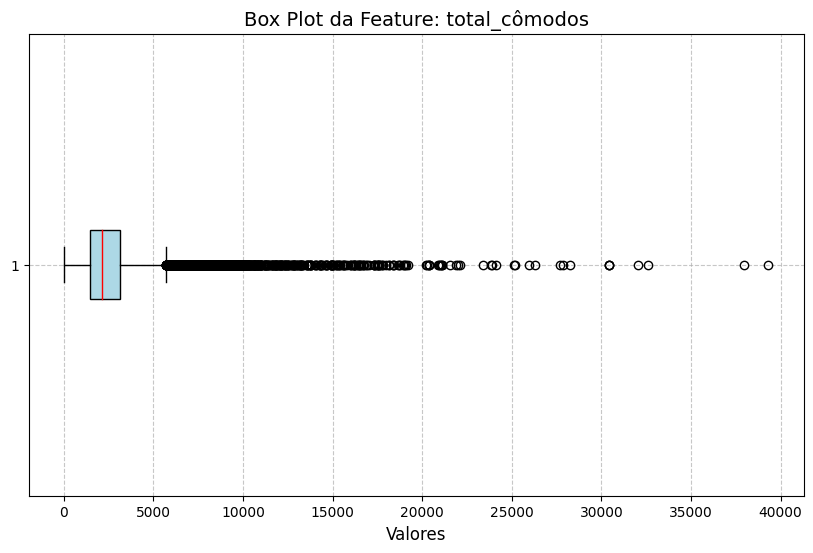

In [20]:
# Criar o box plot para a feature selecionada
plt.figure(figsize=(10, 6))
plt.boxplot(housing[feature1], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot da Feature: {feature1}', fontsize=14)
plt.xlabel('Valores', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Scatter Plot:** *Outliers* também podem ser visualizados como pontos isolados em um *scatter plot*.


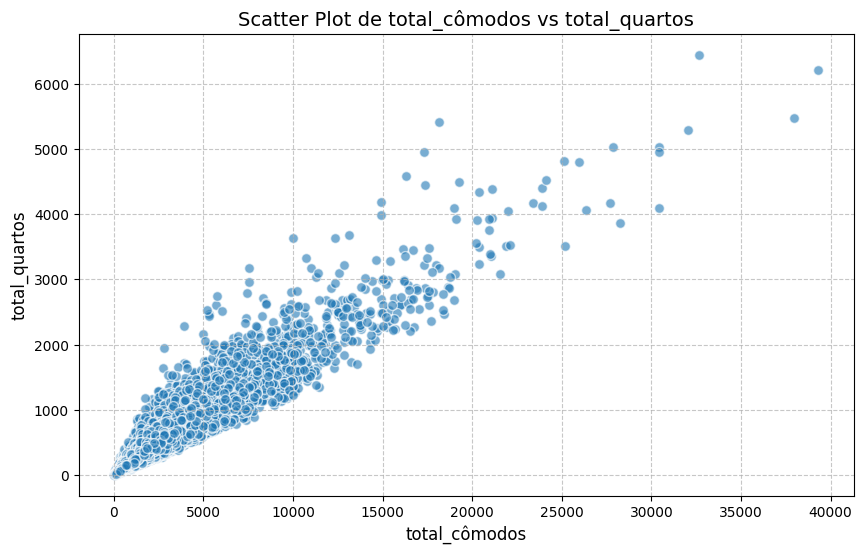

In [21]:
# Criar o scatter plot para as duas features
plt.figure(figsize=(10, 6))
plt.scatter(housing[feature1], housing[feature2], alpha=0.6, edgecolors='w', s=50)
plt.title(f'Scatter Plot de {feature1} vs {feature2}', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### **Tratamento de Outliers**

##### **Remoção**

Valores identificados como *outliers* podem ser removidos do conjunto de dados.

In [22]:
# Filtra o DataFrame para excluir as linhas cujos índices estão presentes no DataFrame de outliers
df_cleaned = housing.loc[~housing.index.isin(outliers.index)].copy()

# Exibir o DataFrame limpo
df_cleaned

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INTERIOR
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INTERIOR
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INTERIOR
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INTERIOR


#### **Transformações**

**Transformações Logarítmicas:** Aplicar uma transformação logarítmica pode reduzir a influência de outliers.




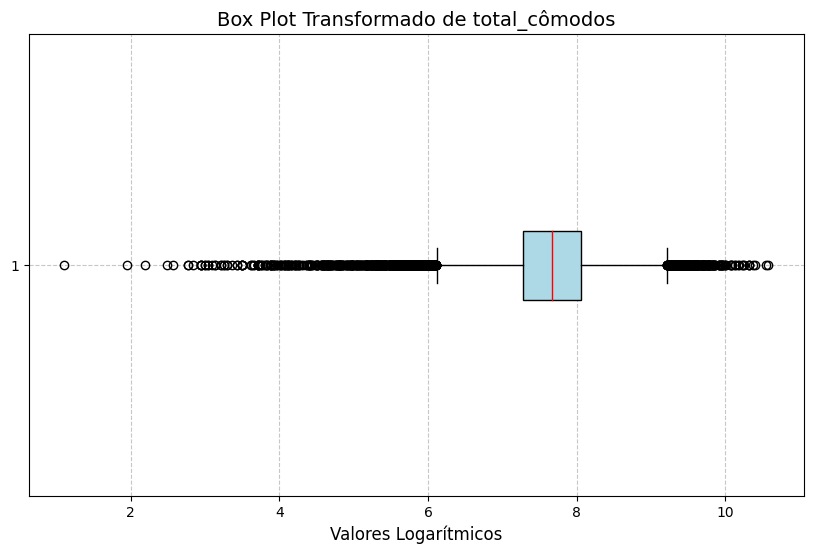

In [23]:
# Aplicar transformação logarítmica para estabilizar a variância e reduzir o impacto de outliers
transformed_data = np.log1p(housing[feature1])

# Criar o box plot para os dados transformados
plt.figure(figsize=(10, 6))
plt.boxplot(transformed_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot Transformado de {feature1}', fontsize=14)
plt.xlabel('Valores Logarítmicos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Winsorizing:** Substituir outliers por valores próximos aos limites do intervalo IQR.

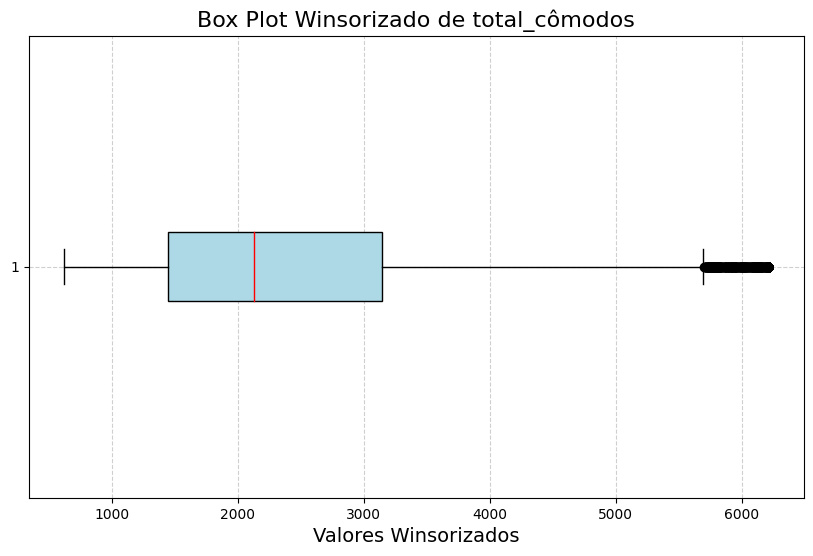

In [24]:
from scipy.stats import mstats

# Aplicar Winsorization para limitar a influência de outliers
winsorized_data = mstats.winsorize(housing[feature1], limits=[0.05, 0.05])

# Configurar e criar o box plot para os dados Winsorizados
plt.figure(figsize=(10, 6))
plt.boxplot(winsorized_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot Winsorizado de {feature1}', fontsize=16)
plt.xlabel('Valores Winsorizados', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### **Algoritmos Robustos**



**Regressão Robusta:** Usar algoritmos de regressão robustos a *outliers*, como Regressão de M-estimadores.

**Métodos de Detecção de Outliers:** Algoritmos como [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) ou [One-Class SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) podem ser usados para detectar e tratar outliers.

### **Codificação de Variáveis Categóricas:**

Como muitos algoritmos de aprendizado de máquina exigem variáveis numéricas, variáveis categóricas devem ser convertidas em representações numéricas. Técnicas comuns para essa conversão incluem:

- **[One-Hot Encoding:](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)** Para cada valor distinto de uma variável categórica, cria-se uma nova coluna binária (com valores 0 ou 1). O valor "1" indica a presença da categoria em uma determinada observação, enquanto "0" indica a ausência. Esse método evita que os modelos interpretem a ordem ou relação entre os valores categóricos, preservando a natureza categórica dos dados.

In [25]:
# Aplicar One-Hot Encoding na coluna 'proximidade_ao_oceano'
data_one_hot_encoded = pd.get_dummies(housing, columns=['proximidade_ao_oceano'], prefix='', prefix_sep='', drop_first=True)

# Exibir as primeiras 5 linhas do DataFrame com One-Hot Encoding
data_one_hot_encoded.head()

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,INTERIOR,MENOS DE 1H DO OCEANO,PERTO DA BAÍA,PERTO DO OCEANO
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


- **[Label Encoding:](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)** Cada valor único da categoria recebe um número exclusivo. Ao contrário do one-hot encoding, o label encoding mantém uma ordem implícita entre os valores, o que pode ser problemático em alguns casos, pois os modelos podem interpretar essas categorias como ordinais, mesmo que elas não tenham uma relação natural de hierarquia.

In [26]:
# Aplicar Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_label_encoded = housing.copy()  # Criar uma cópia para não modificar o DataFrame original
data_label_encoded['proximidade_ao_oceano'] = label_encoder.fit_transform(data_label_encoded['proximidade_ao_oceano'])

# 5. Exibir as 5 primeiras linhas do DataFrame com Label Encoding
print("\nDataFrame com Label Encoding:")
data_label_encoded.head()


DataFrame com Label Encoding:


,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,proximidade_ao_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


### **Criação de Novas *Features*:**

A engenharia de *features* envolve a criação de novas variáveis derivadas das já existentes, com o objetivo de extrair informações adicionais e melhorar a performance dos modelos. Isso pode ser realizado por meio da combinação de variáveis ou da aplicação de transformações, como polinômios ou agregações, para capturar padrões mais complexos. Um ponto de partida técnico eficaz é a análise de correlações entre variáveis. A matriz de correlação, que mensura relações lineares entre as *features*, pode ser utilizada para identificar interações significativas, guiando a criação de novas *features* que capturam melhor as influências sobre a variável alvo. Essas novas variáveis podem incluir interações entre variáveis, agrupamentos de categorias, ou transformações não lineares que aumentam a capacidade preditiva do modelo.

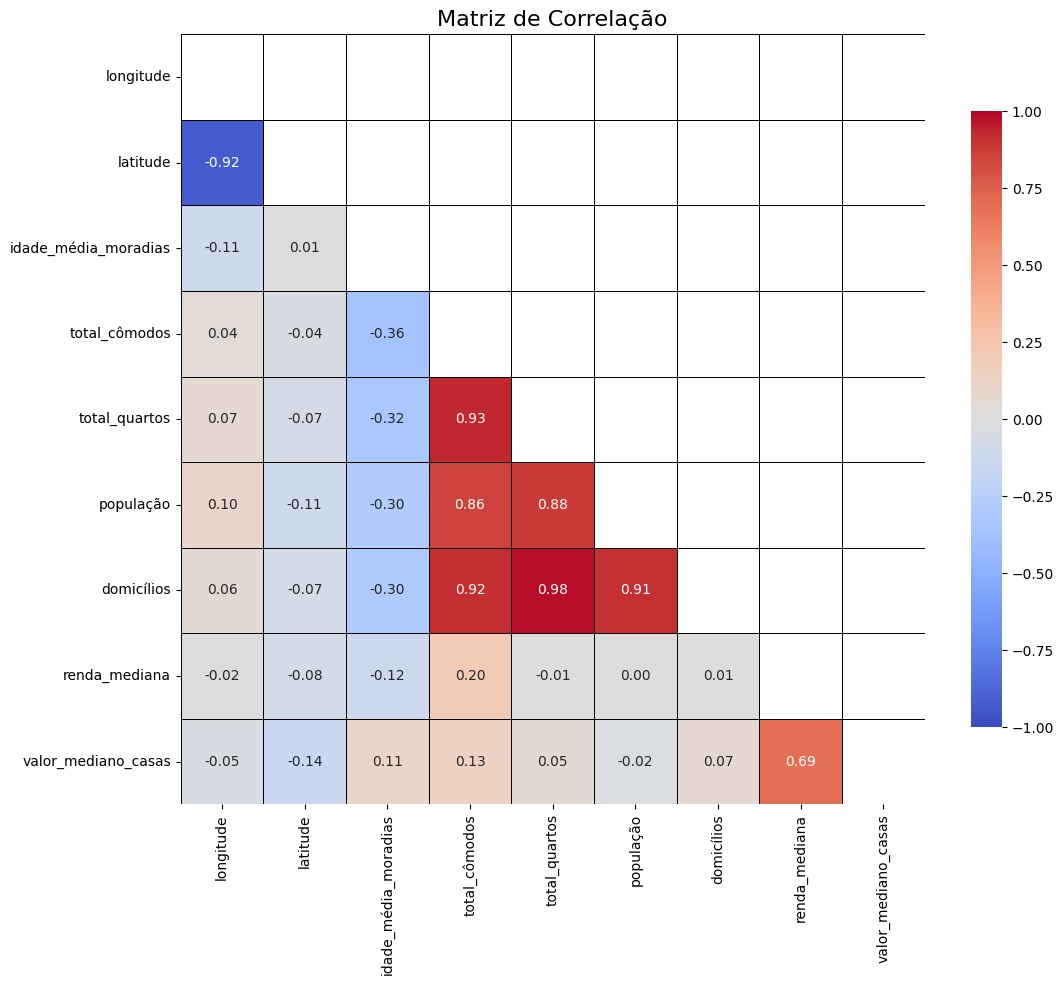

In [27]:
import seaborn as sns

# Calcular a matriz de correlação
corr_matrix = housing.corr(numeric_only=True)

# Criar uma máscara para esconder a parte superior da matriz de correlação
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o mapa de calor da matriz de correlação, aplicando a máscara
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='black',
    vmin=-1, vmax=1,
    cbar_kws={"shrink": .8},
    mask=mask # Aplicar a máscara para esconder a parte superior
)

# Adicionar título ao gráfico
plt.title("Matriz de Correlação", fontsize=16)

# Exibir o gráfico
plt.show()

A multicolinearidade ocorre quando duas ou mais variáveis independentes em um modelo possuem alta correlação, prejudicando a eficiência dos algoritmos de aprendizado de máquina ao introduzir redundância informacional. Isso dificulta a identificação dos impactos individuais das variáveis no modelo, levando a coeficientes instáveis e maior variância nas estimativas. Em geral, correlações acima de um limiar predefinido (comumente 0.8) sugerem multicolinearidade significativa. O código a seguir identifica essas variáveis altamente correlacionadas, permitindo a aplicação de estratégias para mitigar o problema, como a remoção de uma das variáveis redundantes, combinação de features, ou uso de técnicas de regularização (ex.: Lasso, Ridge), que penalizam a presença de variáveis correlacionadas e controlam seus efeitos no modelo.







In [28]:
# Definir um limiar de correlação
limiar_corr = 0.8

# Criar uma lista para armazenar as variáveis altamente correlacionadas
variaveis_altamente_correlacionadas = []

# Iterar sobre a matriz de correlação para identificar variáveis correlacionadas acima do limiar
for coluna in corr_matrix.columns:
    for linha in corr_matrix.index:
        if abs(corr_matrix.loc[linha, coluna]) > limiar_corr and coluna != linha:
            variaveis_altamente_correlacionadas.append((linha, coluna, corr_matrix.loc[linha, coluna]))

# Remover duplicatas (pares invertidos) da lista
variaveis_altamente_correlacionadas = list(set([tuple(sorted(tup[:2])) + (tup[2],) for tup in variaveis_altamente_correlacionadas]))

# Exibir as variáveis altamente correlacionadas
variaveis_altamente_correlacionadas

[('domicílios', 'população', 0.9072222660959659),
 ('total_cômodos', 'total_quartos', 0.9303795046865031),
 ('domicílios', 'total_quartos', 0.9797282708045709),
 ('latitude', 'longitude', -0.9246644339150368),
 ('população', 'total_quartos', 0.8777467431529311),
 ('população', 'total_cômodos', 0.8571259728659829),
 ('domicílios', 'total_cômodos', 0.9184844926543111)]

Para lidar com esse problema e reduzir a redundância entre variáveis, uma abordagem eficaz é criar novas features que sintetizem a informação de forma mais eficiente. Assim, foram propostas as seguintes features derivadas:

- **cômodos_por_casa:** razão entre o total de cômodos e o número de domicílios, representando a média de cômodos por residência.

In [29]:
# Cria uma cópia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'cômodos_por_casa'
housing_copy["cômodos_por_casa"] = housing_copy["total_cômodos"] / housing_copy["domicílios"]

# Calcular a matriz de correlação entre as variáveis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['cômodos_por_casa', 'total_cômodos', 'domicílios', 'valor_mediano_casas']].corr()

# Filtrar as correlações das variáveis com o desfecho 'valor_mediano_casas', exceto a própria variável
correlacoes_com_desfecho = correlacoes.loc[['cômodos_por_casa', 'total_cômodos', 'domicílios'], 'valor_mediano_casas']

# Exibir as correlações
correlacoes_com_desfecho

,valor_mediano_casas
cômodos_por_casa,0.151948
total_cômodos,0.134153
domicílios,0.065843


A análise indica que a variável `cômodos_por_casa` é mais relevante para prever o `valor_mediano_casas` do que as variáveis `total_cômodos` e `domicílios`, pois apresenta um coeficiente de correlação mais alto. Isso significa que a relação entre o número de cômodos e a quantidade de domicílios é um indicativo mais forte do valor das casas, tornando essa métrica mais útil para a modelagem preditiva.

- **razao_quartos:** Proporção de quartos em relação ao total de cômodos, indicando a fração dos cômodos que são quartos.







In [30]:
# Cria uma cópia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'razao_quartos'
housing_copy["razao_quartos"] = housing_copy["total_quartos"] / housing_copy["total_cômodos"]

# Calcular a matriz de correlação entre as variáveis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['razao_quartos', 'total_quartos', 'total_cômodos', 'valor_mediano_casas']].corr()

# Filtrar as correlações das variáveis com o desfecho 'valor_mediano_casas', exceto a própria variável
correlacoes_com_desfecho = correlacoes['valor_mediano_casas'].drop('valor_mediano_casas')

# Exibir as correlações
correlacoes_com_desfecho

,valor_mediano_casas
razao_quartos,-0.255880
total_quartos,0.049686
total_cômodos,0.134153


A `razao_quartos`, com uma correlação negativa significativa, sugere que um aumento na razão entre o número de quartos e o total de cômodos pode estar associado a uma diminuição no valor mediano das casas. Isso pode indicar que, em áreas onde a proporção de quartos é maior em relação ao total de cômodos, o valor das propriedades tende a ser menor. O `total_quartos` apresenta uma correlação muito fraca com o `valor_mediano_casas`, indicando que o número absoluto de quartos tem pouco impacto na valorização das casas. O `total_cômodos` possui uma correlação positiva moderada com o `valor_mediano_casas`, indicando que, à medida que o número total de cômodos aumenta, o valor mediano das casas tende a aumentar também, embora não de maneira tão forte quanto a razao_quartos sugere.

- **pessoas_por_casa:** razão entre a população e o número de domicílios, indicando a média de habitantes por residência.

In [31]:
# Cria uma cópia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'pessoas_por_casa'
housing_copy["pessoas_por_casa"] = housing_copy["população"] / housing_copy["domicílios"]

# Calcular a matriz de correlação entre as variáveis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['pessoas_por_casa', 'população', 'domicílios', 'valor_mediano_casas']].corr()

# Filtrar as correlações das variáveis com o desfecho 'valor_mediano_casas', exceto a própria variável
correlacoes_com_desfecho = correlacoes['valor_mediano_casas'].drop('valor_mediano_casas')

# Exibir as correlações
correlacoes_com_desfecho

,valor_mediano_casas
pessoas_por_casa,-0.023737
população,-0.024650
domicílios,0.065843


A `pessoas_por_casa` tem uma correlação negativa muito fraca com o `valor_mediano_casas`, indicando que a razão de pessoas por domicílio não tem um impacto significativo no valor das casas. Esse resultado sugere que o número médio de moradores por casa não é um fator determinante na valorização do imóvel. A `população` também apresenta uma correlação negativa e muito fraca com o `valor_mediano_casas`, o que indica que o tamanho total da população não está relacionado de maneira perceptível ao valor das propriedades. A `domicílios`, com uma correlação positiva fraca, sugere que um aumento no número de domicílios está associado a uma leve elevação no valor mediano das casas, embora essa relação seja fraca.

#### **Escalonamento e Normalizacão**

É um procedimento de transformação de dados que normaliza as *features* para uma escala comum. Normalmente, isso é feito ajustando os dados para um intervalo fixo, como [0, 1], ou para uma distribuição com média zero e desvio padrão um. O objetivo é assegurar que cada *feature* tenha igual importância na análise, evitando a dominância de variáveis com magnitudes diferentes. Modelos baseados em distâncias, como [regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [máquinas de vetores de suporte](https://scikit-learn.org/stable/modules/svm.html) (SVM) e k-vizinhos mais próximos (KNN), são sensíveis às escalas das variáveis e, portanto, se beneficiam da normalização. Isso ocorre porque esses modelos calculam distâncias ou coeficientes entre as variáveis, sendo afetados por discrepâncias nas magnitudes. Por outro lado, modelos como árvores de decisão, florestas aleatórias e boosting (como XGBoost), não exigem normalização, pois as divisões ou splits nas árvores são baseadas em regras de decisão que utilizam limites absolutos dos dados. Assim, esses modelos são naturalmente invariantes à escala das variáveis, tornando a normalização desnecessária.

- **Normalização Min-Max:** escala os dados para um intervalo específico, geralmente [0, 1].

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Criar o normalizador Min-Max
scaler = MinMaxScaler()

# Aplicar a normalização
housing_normalizado = pd.DataFrame(scaler.fit_transform(data_one_hot_encoded), columns=data_one_hot_encoded.columns)

# Verificar os primeiros registros do DataFrame normalizado
housing_normalizado.head()

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,INTERIOR,MENOS DE 1H DO OCEANO,PERTO DA BAÍA,PERTO DO OCEANO
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,1.0,0.0


**Padronização (Z-Score Normalization):** A padronização transforma os dados para que tenham média zero e desvio padrão um.


In [33]:
from sklearn.preprocessing import StandardScaler

# Criar o normalizador Z-Score
scaler = StandardScaler()

# Aplicar a padronização
housing_padronizado = pd.DataFrame(scaler.fit_transform(data_one_hot_encoded), columns=data_one_hot_encoded.columns)

# Verificar os primeiros registros do DataFrame padronizado
housing_padronizado.head()

,longitude,latitude,idade_média_moradias,total_cômodos,total_quartos,população,domicílios,renda_mediana,valor_mediano_casas,INTERIOR,MENOS DE 1H DO OCEANO,PERTO DA BAÍA,PERTO DO OCEANO
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,-0.681889,-0.891156,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,-0.681889,-0.891156,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,-0.681889,-0.891156,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,-0.681889,-0.891156,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,-0.681889,-0.891156,2.830742,-0.384466


**ATENÇÃO:** A escolha da técnica de escalonamento é importante para o desempenho da classificação, como demonstrado no estudo [Meta-Scaler: A Meta-Learning Framework for the Selection of Scaling Techniques](https://ieeexplore.ieee.org/document/10445017), que discute a influência das técnicas de escalonamento no desempenho dos algoritmos de aprendizado de máquina. A escolha inadequada pode comprometer a eficácia do modelo, destacando a importância de uma abordagem fundamentada na seleção do método de escalonamento apropriado para os dados específicos em análise.


## **4. Seleção de Features:**

A seleção de *features* é um passo crítico no pré-processamento de dados em projetos de aprendizado de máquina, onde o objetivo é identificar e selecionar as variáveis mais relevantes para o modelo. Este processo é fundamental para melhorar o desempenho do modelo, reduzir a complexidade computacional e evitar problemas como *overfitting*. Existem várias abordagens para a seleção de *features*, que podem ser categorizadas em três principais tipos:



### **Métodos de Filtragem (Filter Methods)**




Operam de forma independente do modelo de aprendizado de máquina, utilizando métricas estatísticas para avaliar a relevância individual de cada feature em relação à variável alvo. Essa abordagem oferece uma maneira computacionalmente eficiente de reduzir a dimensionalidade dos dados, removendo features irrelevantes ou redundantes antes do treinamento do modelo.

### **Métodos de Wrapper (Wrapper Methods)**


Representam uma classe de técnicas de seleção de *features* que se distinguem por sua interação direta com o modelo de aprendizado de máquina. Ao contrário dos métodos de filtro, que avaliam as *features* de forma independente, os métodos wrapper utilizam o desempenho do modelo como critério para selecionar o subconjunto ótimo de *features*.



### **Métodos Embutidos (Embedded Methods)**

 A principal característica dos métodos embutidos é a sua capacidade de atribuir pesos ou importância às *features* durante o processo de treinamento. Esses pesos refletem a contribuição de cada feature para o desempenho do modelo, permitindo a identificação e seleção das *features* mais relevantes. A seleção pode ocorrer de forma explícita, descartando *features* com pesos baixos, ou implícita, através da regularização, que penaliza o uso de *features* menos importantes.

## **5. Treinamento do Modelo**

O treinamento de modelos de aprendizado de máquina é o processo central no qual um algoritmo aprende a partir de dados, ajustando seus parâmetros internos para minimizar o erro em relação a uma tarefa específica. É nessa fase que o modelo adquire a capacidade de generalizar padrões e fazer previsões ou tomar decisões sobre novos dados não vistos durante o treinamento. O treinamento de modelos de aprendizado de máquina apresenta diversos desafios, incluindo:

- **Escolha do Algoritmo:** É importante considerar fatores como a complexidade do modelo, a interpretabilidade dos resultados e a capacidade de lidar com diferentes tipos de dados.

- **Hiperparâmetros:** Cada algoritmo possui hiperparâmetros que controlam seu comportamento e influenciam o aprendizado. A escolha dos valores ideais para esses hiperparâmetros é crucial para otimizar o desempenho do modelo e evitar *overfitting* ou *underfitting*.

- **Qualidade dos Dados:** A qualidade dos dados de treinamento é fundamental para o sucesso do modelo. Dados ruidosos, incompletos ou com vieses podem prejudicar o aprendizado e levar a resultados insatisfatórios.

- **Recursos Computacionais:** O treinamento de modelos complexos, especialmente com grandes volumes de dados, pode exigir recursos computacionais significativos em termos de memória, processamento e tempo.

### **A Separação em Features e Target**

Para iniciar o treinamento de um modelo de aprendizado de máquina supervisionado, é fundamental separar os dados em duas partes:

In [34]:
X = housing.drop(columns=['valor_mediano_casas']) # São as variáveis independentes ou preditoras que serão usadas para fazer previsões.
y = housing['valor_mediano_casas'] # É a variável dependente ou alvo que queremos prever.

### **Preparando os Dados para o Aprendizado de Máquina**

[Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) são uma ferramenta robusta no contexto de aprendizado de máquina que facilitam a automação e a organização de sequências de etapas de transformação de dados e treinamento de modelos. Eles oferecem uma estrutura eficiente para encadear operações, desde o pré-processamento dos dados até a avaliação do modelo final, garantindo clareza e reprodutibilidade no fluxo de trabalho. Neste projeto, utilizaremos a [árvore de regressão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) como o modelo para a análise dos dados. A implementação seguirá os passos essenciais, incluindo:










#### **1. Criar um pipeline para imputar variáveis numéricas**.








In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline_numerico = Pipeline([
    ('imputacao', SimpleImputer(strategy="median")),  # Imputação de valores ausentes com a mediana
])

#### **2. Criar um pipeline para codificar variáveis categóricas**









In [36]:
from sklearn.preprocessing import OneHotEncoder

pipeline_categorico = Pipeline(steps=[
    ('codificador', OneHotEncoder())  # Ignorar categorias desconhecidas e gerar uma saída densa
])

#### **3. Criar um pré-processador que aplica diferentes transformações a colunas específicas**

In [37]:
from sklearn.compose import ColumnTransformer

# Selecionar colunas numéricas e categóricas
colunas_numericas = list(X.select_dtypes(include=['float64', 'int64']).columns)
colunas_categoricas = ['proximidade_ao_oceano']

# Criar um pré-processador que aplica diferentes transformações a colunas específicas
preprocessador = ColumnTransformer([
    ('num', pipeline_numerico, colunas_numericas),  # Aplicar pipeline numérico às colunas numéricas
    ('cat', pipeline_categorico, colunas_categoricas),  # Aplicar pipeline categórico às colunas categóricas
])

### **Treinando e Avaliando no Conjunto de Completo**




Com o *pipeline* devidamente configurado para processar tanto variáveis numéricas quanto categóricas, garantimos que os dados sejam adequadamente pré-processados e preparados para o modelo de maneira eficiente. A abordagem modular e estruturada dos *pipelines* permite a integração de múltiplas etapas de transformação, assegurando que as mesmas operações sejam aplicadas de forma consistente durante as fases de treinamento e validação, minimizando o risco de vazamento de dados e maximizando a robustez do modelo.








In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Treinar o modelo
pipeline.fit(X, y)

# Fazer previsões
y_pred = pipeline.predict(X)

# Avaliar o modelo
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir os resultados
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 0.0
R²: 1.0


Os resultados obtidos no treinamento e avaliação do modelo, com um erro quadrático médio (RMSE) de 0.0 e um coeficiente de determinação (R²) de 1.0, evidenciam um caso claro de *overfitting*. Esse fenômeno indica que o modelo se ajustou perfeitamente aos dados de treinamento, memorizando-os em vez de extrair e generalizar os padrões subjacentes. O *overfitting* ocorre quando a complexidade do modelo é excessiva em relação à quantidade e variabilidade dos dados disponíveis, resultando em um desempenho excepcional nos dados de treinamento, mas comprometendo a capacidade de generalização para novos dados.



### **Treinamento no Conjunto de Treino e Avaliação no Conjunto de Teste**







Para confirmar o *overfitting*, vamos avaliar o modelo em um conjunto de dados de teste separado, que ele nunca viu antes. Se o desempenho no conjunto de teste for significativamente pior do que no conjunto de treinamento, isso confirmará a presença de *overfitting*. A função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do pacote *sklearn* é usada para dividir um conjunto de dados em dois subconjuntos: treinamento e teste.

In [39]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo no conjunto de treinamento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputacao',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['longitude', 'latitude',
                                                   'idade_média_moradias',
                                                   'total_cômodos',
                                                   'total_quartos', 'população',
                                                   'domicílios',
                                                   'renda_mediana']),
                                                 ('cat',
                                                  Pipeline(steps=[('codificador',
                                                                   OneHotEncoder())]),
                                                  ['proximidade_ao_oceano'])])),
                ('modelo', DecisionTreeRegressor(random_state=42))])

#### **Avaliando os resultados do conjunto de treino**


In [40]:
# Fazer previsões no conjunto de treino
y_train_pred = pipeline.predict(X_train)

# Avaliar o modelo no conjunto de treino
rmse_train = root_mean_squared_error(y_train, y_train_pred)  # RMSE
r2_train = r2_score(y_train, y_train_pred)  # Coeficiente de determinação

# Imprimir os resultados do conjunto de treino
print("Resultados no Conjunto de Treino:")
print(f'RMSE: {rmse_train:.4f}')
print(f'R²: {r2_train:.4f}')

Resultados no Conjunto de Treino:
RMSE: 0.0000
R²: 1.0000


Os resultados obtidos no conjunto de treinamento continuam indicando um ajuste perfeito do modelo aos dados

#### **Avaliando os resultados do conjunto de teste**

In [41]:
# Fazer previsões no conjunto de teste
y_test_pred = pipeline.predict(X_test)

# Avaliar o modelo no conjunto de teste
rmse_test = root_mean_squared_error(y_test, y_test_pred)  # RMSE
r2_test = r2_score(y_test, y_test_pred)  # Coeficiente de determinação

# Imprimir os resultados do conjunto de teste
print("Resultados no Conjunto de Teste:")
print(f'RMSE: {rmse_test:.4f}')
print(f'R²: {r2_test:.4f}')

Resultados no Conjunto de Teste:
RMSE: 68734.8847
R²: 0.6395


Os resultados no conjunto de teste mostram um desempenho consideravelmente inferior em relação ao conjunto de treinamento. O RMSE foi de 68734.8847, indicando que o modelo possui uma margem de erro significativa nas previsões. O coeficiente de determinação (R²) de 0,6395 sugere que o modelo explica apenas 63,95% da variação dos dados de teste, confirmando a hipótese de *overfitting*.

### ***Overfitting* em Árvores**

Em uma árvore de regressão, o *overfitting* ocorre com frequência quando a profundidade da árvore aumenta excessivamente, resultando em uma modelagem detalhada dos ruídos e particularidades do conjunto de treinamento. Isso compromete sua capacidade de generalização, reduzindo o desempenho preditivo em dados não observados.









In [42]:
# Extraia o modelo treinado do pipeline
modelo_treinado = pipeline.named_steps['modelo']

# Acesse e imprima a profundidade da árvore
profundidade = modelo_treinado.get_depth()
print(f"A profundidade da árvore é: {profundidade}")

A profundidade da árvore é: 37


Para avaliar o impacto da profundidade de uma árvore de regressão, é essencial quantificar os erros em ambos os conjuntos, de treino e teste, em diversos valores de profundidade máxima. Essa metodologia permite uma análise detalhada do comportamento do modelo em relação ao ajuste aos dados, facilitando a detecção de sinais de *underfitting* e *overfitting*. O parâmetro `max_depth` estabelece um limite para a profundidade da árvore, restringindo o número de níveis que ela pode alcançar. Essa limitação previne a complexidade excessiva da árvore, reduzindo o risco de ajuste excessivo aos dados de treinamento e promovendo uma melhor generalização em conjuntos de dados não vistos.








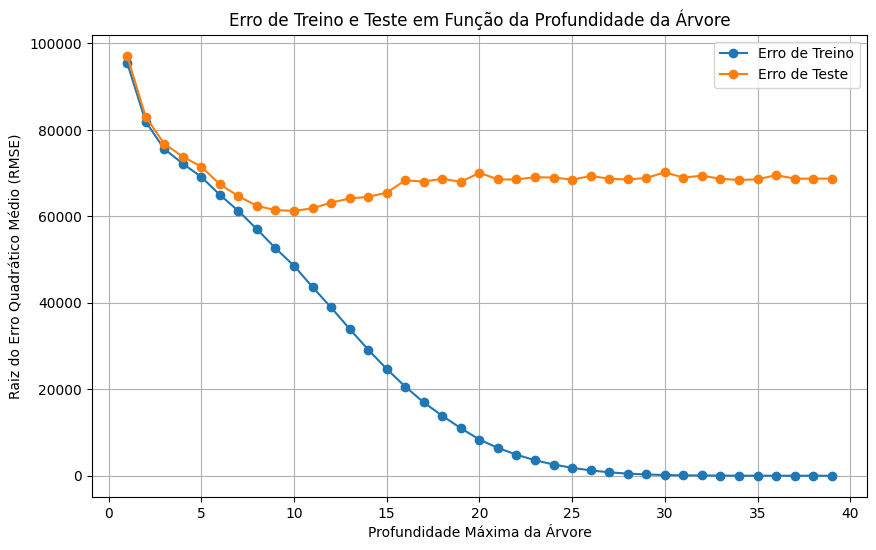

In [44]:
# Definir intervalos de profundidade para testar
max_depths = np.arange(1, 40)

# Listas para armazenar erros de treino e teste
train_errors = []
test_errors = []

# Loop para testar diferentes profundidades
for depth in max_depths:
    # Criar o pipeline com a profundidade atual
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('modelo', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])

    # Treinar o modelo
    pipeline.fit(X_train, y_train)

    # Fazer previsões nos conjuntos de treino e teste
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calcular o erro quadrático médio (MSE) para treino e teste
    train_mse = root_mean_squared_error(y_train, y_train_pred)
    test_mse = root_mean_squared_error(y_test, y_test_pred)

    # Armazenar os erros
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Erro de Treino', marker='o')
plt.plot(max_depths, test_errors, label='Erro de Teste', marker='o')
plt.xlabel('Profundidade Máxima da Árvore')
plt.ylabel('Raiz do Erro Quadrático Médio (RMSE)')
plt.title('Erro de Treino e Teste em Função da Profundidade da Árvore')
plt.legend()
plt.grid(True)
plt.show()

### **Estratégias para Combater o *Overfitting***

Apresenta-se um fluxograma típico do fluxo de trabalho de validação cruzada (Cross-validation), uma metodologia essencial para a avaliação e otimização do desempenho de modelos de aprendizado de máquina durante o processo de treinamento. Essa abordagem permite uma análise sistemática da eficácia dos modelos, promovendo uma estimativa mais precisa da capacidade de generalização em dados não vistos.








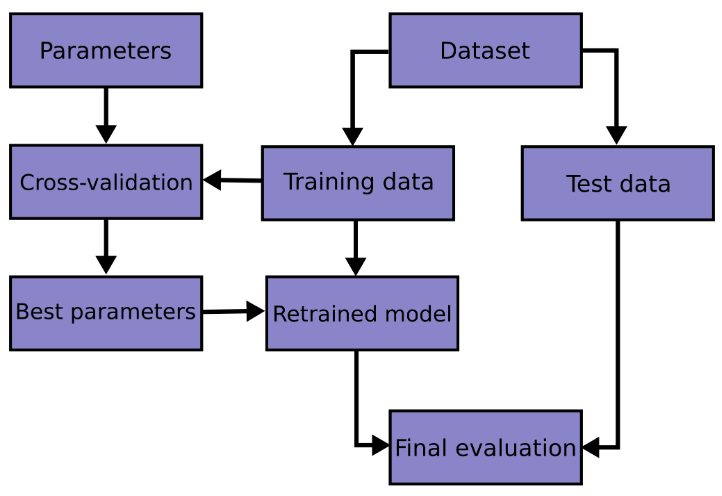

A validação cruzada é uma técnica que envolve a divisão do conjunto de dados em múltiplos subconjuntos, chamados de folds. Nesse processo, o modelo é treinado em um subconjunto específico dos dados e, em seguida, testado em outro subconjunto, garantindo uma avaliação de desempenho mais robusta. Essa abordagem minimiza o viés associado à superexposição aos dados de treinamento, proporcionando uma estimativa mais precisa da capacidade de generalização do modelo em dados não vistos.















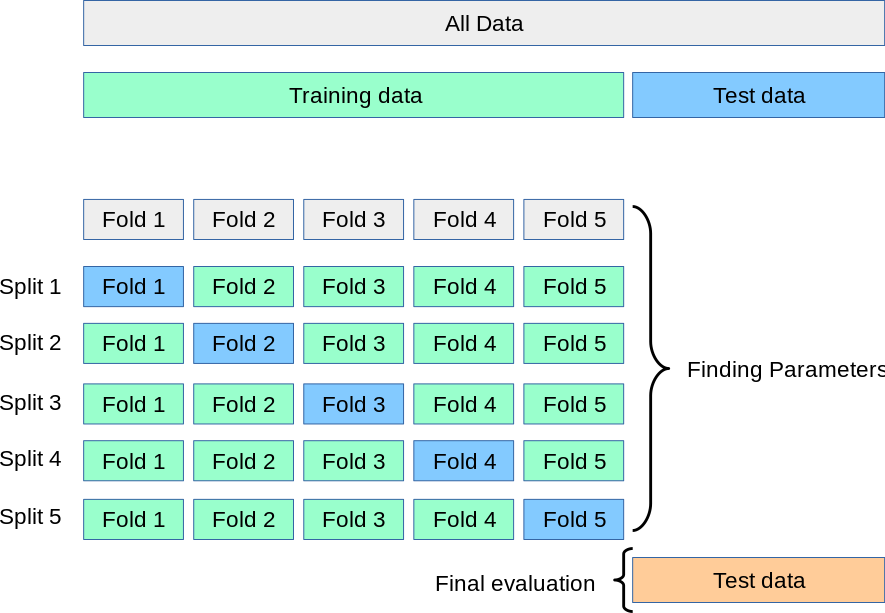

A seguir, apresenta-se uma implementação prática da validação cruzada utilizando a técnica K-Fold.

In [45]:
from sklearn.model_selection import KFold

# Definir o número de folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Listas para armazenar os resultados de RMSE e R²
rmse_scores = []
r2_scores = []

# Loop para realizar a validação cruzada
for train_index, test_index in kf.split(X_train):
    # Usar iloc para indexar corretamente os DataFrames
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # Treinar o modelo
    pipeline.fit(X_fold_train, y_fold_train)

    # Fazer previsões
    y_pred = pipeline.predict(X_fold_val)

    # Avaliar o modelo
    rmse = root_mean_squared_error(y_fold_val, y_pred)
    r2 = r2_score(y_fold_val, y_pred)

    # Armazenar os resultados
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calcular médias e desvios padrão
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Imprimir os resultados
print(f'Média RMSE: {mean_rmse:.3f} ± {std_rmse:.3f}')
print(f'Média R²: {mean_r2:.3f} ± {std_r2:.3f}')


Média RMSE: 62561.838 ± 1472.591
Média R²: 0.707 ± 0.008


O ajuste de hiperparâmetros é o processo de otimização dos parâmetros que não são aprendidos diretamente pelo modelo durante o treinamento, mas que afetam seu desempenho, como a profundidade máxima em árvores. Uma estratégia comum para ajustar hiperparâmetros é a busca em grade (grid search), onde um espaço de hiperparâmetros é definido e o modelo é avaliado para cada combinação de parâmetros usando validação cruzada.

In [46]:
from sklearn.model_selection import GridSearchCV

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Definir a grade de parâmetros para otimização
param_grid = {
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2', n_jobs=-1)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Extrair os melhores parâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Avaliar o desempenho do modelo otimizado
y_pred = best_model.predict(X_test)

# Calcular RMSE e R²
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Imprimir os melhores parâmetros e os resultados de desempenho
print(f'Melhores parâmetros: {best_params}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')


Melhores parâmetros: {'modelo__max_depth': 10, 'modelo__min_samples_leaf': 4, 'modelo__min_samples_split': 10}
RMSE: 245.159
R²: 0.724


## **6. Avaliação dos Resultados**


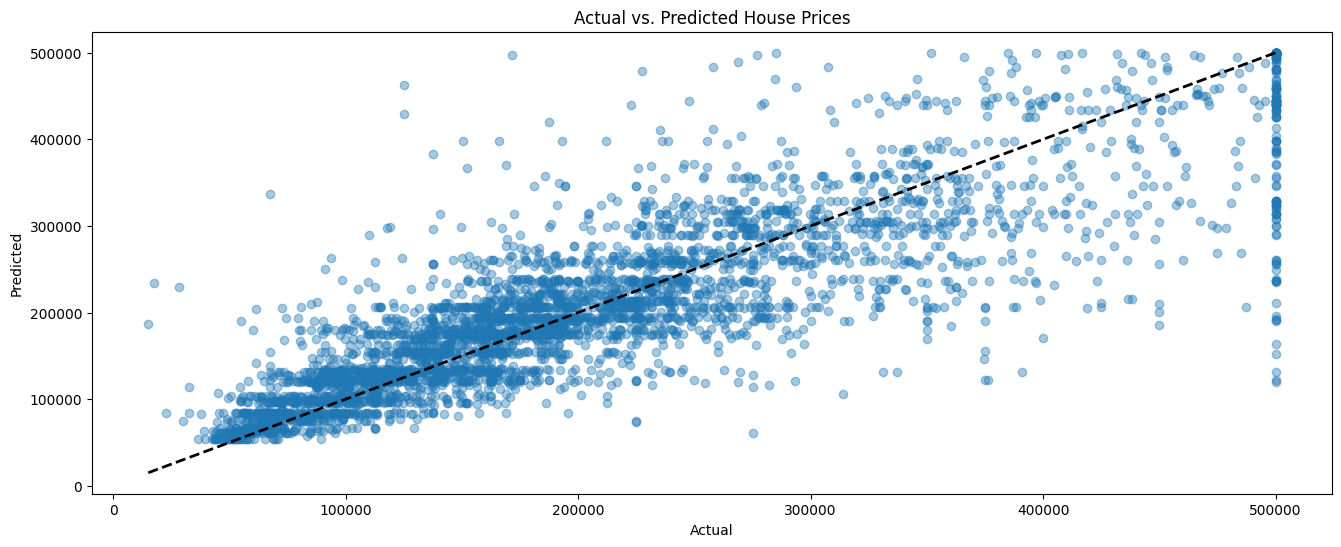

In [47]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(16, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

## 7. Persistencia

# **Exercícios**

**1. Exercício: Avaliação de um Regressor SVM**

  Experimente utilizar um regressor de Máquina de Vetores de Suporte (Support Vector Machine Regressor) da biblioteca sklearn.svm (SVR) com diferentes hiperparâmetros. Considere testar o parâmetro kernel com os valores "linear" (testando diversos valores para o hiperparâmetro $𝐶$) e "rbf" (também testando diferentes valores para os hiperparâmetros $𝐶$ e $𝛾$).

  **Observação:** Os SVMs não escalam bem para conjuntos de dados grandes, portanto, é recomendável treinar seu modelo apenas com as primeiras 5.000 instâncias do conjunto de treinamento e utilizar apenas validação cruzada em 3 dobras (3-fold cross-validation), para evitar longos tempos de execução. Neste momento, não se preocupe com o significado dos hiperparâmetros (consulte o notebook sobre SVM se tiver interesse). Após a otimização, avalie o desempenho do melhor preditor SVR.

  **Dicas:**
  - Configuração do Pipeline: Considere utilizar um pipeline para pré-processamento e modelagem, facilitando a implementação.
  - Análise de Resultados: Analise as métricas de desempenho, como RMSE e R², para entender a eficácia do modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Definindo o grid de parâmetros para Logistic Regression
param_grid = [
    {'logreg__C': [0.01, 0.1, 1, 10, 100], 'logreg__penalty': ['l2', 'none']},
]

# Criar o pipeline com a etapa de pré-processamento e a Regressão Logística
logreg_pipeline = Pipeline([("preprocessing", preprocessador), ("logreg", LogisticRegression(max_iter=1000))])

# Aplicando GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=kf, scoring='r2', verbose=2)

# Treinando o modelo com as 5.000 primeiras instâncias do conjunto de treino
grid_search.fit(X_train[:5000], y_train[:5000])

# Melhor modelo encontrado pelo GridSearch
best_model = grid_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliando o modelo com RMSE e R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f"Melhor modelo: {best_model}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................logreg__C=0.01, logreg__penalty=l2; total time= 7.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", li

[CV] END .................logreg__C=0.01, logreg__penalty=l2; total time= 6.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................logreg__C=0.01, logreg__penalty=l2; total time= 7.2min


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [1, 3, 10, 30, 100,
                                               300, 1000, 3000]},
        {'svr__kernel': ['rbf'], 'svr__C': [1, 3, 10, 30, 100, 300,
                                            1000],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessador), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='r2')
grid_search.fit(X_train.iloc[:5000], y_train.iloc[:5000])

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

**2. Exercício: Substituindo o GridSearchCV por RandomizedSearchCV**

  Experimente substituir o GridSearchCV por um RandomizedSearchCV para otimização dos hiperparâmetros do seu modelo.

  **Dicas:**

  - Configuração: Defina a busca sobre os hiperparâmetros do modelo, como o valor de $C$, $γ$ e o tipo de kernel utilizado.
  - Controle de Tempo de Execução: Para evitar que a execução demore, limite o número de iterações definindo o parâmetro `n_iter`.
  - Visualização do Processo: Utilize o parâmetro `verbose=2` para obter uma visão detalhada do progresso de cada etapa da busca.

**3. Adicionando um Transformador SelectFromModel no Pipeline de Preparação**

  Tente adicionar um transformador `SelectFromModel` ao *pipeline* de preparação para selecionar apenas os atributos mais importantes.

  **Objetivo:** Criar um novo pipeline que execute o pipeline de preparação definido anteriormente e adicione o transformador SelectFromModel baseado em um RandomForestRegressor, antes do regressor final.

  **Dicas:**
  - Seleção de Atributos: O SelectFromModel utiliza a importância dos atributos calculada por um estimador (neste caso, um RandomForestRegressor).
  - Integração no Pipeline: O transformador de seleção de atributos pode ser adicionado logo após a etapa de preparação e antes do regressor final, para otimizar o desempenho do modelo.
  - Ajustes: Teste diferentes parâmetros e visualize como o desempenho do modelo muda com a seleção de variáveis, utilizando métricas como o RMSE e R².